<a href="https://colab.research.google.com/github/NeomiSony/HobbyRecommendation/blob/main/HobbyRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hb = pd.read_csv("Hobby.csv")

In [4]:
hb.head()

,Time Management,Listening Skills,Reading comprehension,Attention,Linguistic Intelligence,Bodily kineastic intelligence,Spatial awareness,Creative thinking,Self Confidence,Communication Skills,Hobby
0,1,1,1,1,1,1,7,7,1,1,Photography
1,2,1,1,1,1,1,8,7,1,1,Photography
2,3,1,1,1,1,1,9,7,1,1,Photography
3,4,1,1,1,1,1,10,7,1,1,Photography
4,1,2,1,1,1,1,7,8,1,1,Photography


In [5]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Time Management                400 non-null    int64 
 1   Listening Skills               400 non-null    int64 
 2   Reading comprehension          400 non-null    int64 
 3   Attention                      400 non-null    int64 
 4   Linguistic Intelligence        400 non-null    int64 
 5   Bodily kineastic intelligence  400 non-null    int64 
 6   Spatial awareness              400 non-null    int64 
 7   Creative thinking              400 non-null    int64 
 8   Self Confidence                400 non-null    int64 
 9   Communication Skills           400 non-null    int64 
 10  Hobby                          400 non-null    object
dtypes: int64(10), object(1)
memory usage: 34.5+ KB


In [6]:

# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [7]:
hb.shape

(400, 11)

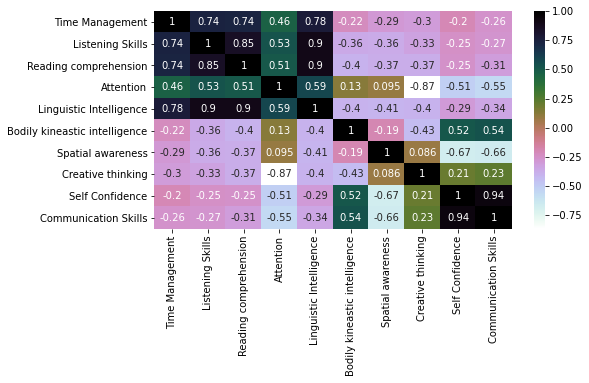

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(hb.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [9]:
train, test = train_test_split(hb, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(280, 11)
(120, 11)


In [10]:
train_X = train[['Time Management','Listening Skills','Reading comprehension','Attention','Linguistic Intelligence','Bodily kineastic intelligence','Spatial awareness','Creative thinking','Self Confidence','Communication Skills']] # taking the training data features
train_y = train.Hobby # output of the training data

test_X = test[['Time Management','Listening Skills','Reading comprehension','Attention','Linguistic Intelligence','Bodily kineastic intelligence','Spatial awareness','Creative thinking','Self Confidence','Communication Skills']] # taking test data feature
test_y = test.Hobby # output value of the test data

In [11]:
train_X.head()

,Time Management,Listening Skills,Reading comprehension,Attention,Linguistic Intelligence,Bodily kineastic intelligence,Spatial awareness,Creative thinking,Self Confidence,Communication Skills
142,3,3,3,5,1,9,9,1,1,1
202,3,1,1,1,1,9,1,5,7,7
271,4,2,1,2,1,10,1,6,10,8
313,6,8,10,5,7,2,4,1,1,1
314,5,9,10,6,7,3,4,1,1,1


In [12]:
test_X.head()

,Time Management,Listening Skills,Reading comprehension,Attention,Linguistic Intelligence,Bodily kineastic intelligence,Spatial awareness,Creative thinking,Self Confidence,Communication Skills
326,5,9,9,6,8,3,3,2,1,1
325,6,8,9,5,8,2,3,2,1,1
376,5,7,10,5,7,1,4,1,2,1
264,1,1,1,2,1,7,1,5,9,7
333,6,8,7,5,9,2,1,3,1,1


In [13]:
train_y.head()

142                Dance
202               Acting
271               Acting
313    Language Learning
314    Language Learning
Name: Hobby, dtype: object

In [14]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  1.0


In [15]:
new_input = [[2,2,3,6,2,9,9,2,2,3]]
# get prediction for new input
new_output = model.predict(new_input)
print(new_output)

['Dance']


In [19]:
new_input = [[2,2,3,3,2,4,7,10,2,3]]
# get prediction for new input
new_output = model.predict(new_input)
print(new_output)

['Photography']


In [16]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  1.0


In [17]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  1.0


In [18]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  1.0
